# Members of the Parliament - 2019
---

Libraries

In [40]:
from batoomer.extras.nd_utils import fetch_nd_data
import numpy as np
import pandas as pd
import json
import tweepy
from tqdm.notebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

Twitter API:

In [345]:
twitter_credentials = []
with open('../../../twitter_credentials.json', 'r') as f:
    twitter_credentials = json.load(f)        

# TwitterAPI Authentication
auth = tweepy.OAuthHandler(twitter_credentials['consumer_key'],
                                   twitter_credentials['consumer_secret'])
auth.set_access_token(twitter_credentials['access_token_key'],
                              twitter_credentials['access_token_secret'])
API = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, timeout=60*5)

Load Dataset

In [13]:
df = pd.read_csv('parliament-members-new.csv')
df.replace(np.nan, '', inplace=True)
df.head()

,Name (Long),Surname,Name,Party,Twitter Handle
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,ViliardosV
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,anaik2020
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,MariaAt03902914
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,B3Vagenas
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,SofAsimak


# Statistics
---

In [14]:
print(f'Size of dataset: {len(df)}.')
print(f"Members with a Twitter Account: {len(df[df['Twitter Handle'] != ''])}")
print(f"Members without a Twitter Account: {len(df[df['Twitter Handle'] == ''])}")

Size of dataset: 300.
Members with a Twitter Account: 241
Members without a Twitter Account: 59


# Statistic for Members with an Account  (29/03/2021)
---

## fetch some data.

In [15]:
results = []
nodes=df[df['Twitter Handle'] != '']['Twitter Handle']
for node in tqdm(nodes, leave=False, desc='Fetching names and descriptions'):
    try:
        user = API.get_user(node)
        results.append(
            [user.screen_name, user.id, user.name, user.protected])
    except tweepy.error.TweepError as err:
        print(f'{node}, {err})')
        results.append([str(),0,str(),False])


results = pd.DataFrame(results)
results.columns = ['screen_name','id','name','protected']
results = results.reset_index().drop('index', axis=1)

Fetching names and descriptions:   0%|          | 0/241 [00:00<?, ?it/s]

xtarantilis, [{'code': 50, 'message': 'User not found.'}])
katsafados, [{'code': 50, 'message': 'User not found.'}])
stergiannakis, [{'code': 63, 'message': 'User has been suspended.'}])


In [26]:
results['real_name'] = list(df[df['Twitter Handle'] != '']['Name'])

In [28]:
results[['screen_name','id','protected', 'real_name', 'name']].to_csv('parliament-member-analysis-search----ERRROR.csv', index=False)

## Reload Data After Processing with Hand

### Profil Names

In [33]:
results = pd.read_csv('parliament-member-analysis-search.csv')

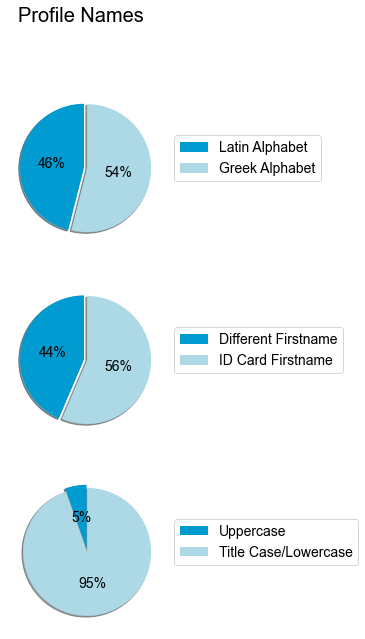

In [236]:
fig, ax = plt.subplots(3,1, figsize=(7.5,10))
color_palette_list = ['#009BD0', '#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

fig.suptitle("Profile Names", fontsize=20, horizontalalignment='center', verticalalignment='center')

x = [list(results['Greeklish']).count(True), list(results['Greeklish']).count(False)]
labels = ['Latin Alphabet', 'Greek Alphabet']
_=ax[0].pie(x, colors=color_palette_list[0:2],
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.05,0))
ax[0].legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

x = [list(results['Different_Name']).count(True), list(results['Different_Name']).count(False)]
labels = ['Different Firstname', 'ID Card Firstname']
_=ax[1].pie(x, colors=color_palette_list[0:2],
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.05,0))
ax[1].legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)



x = [list(results['Uppercase']).count(True), list(results['Uppercase']).count(False)]
labels = ['Uppercase', 'Title Case/Lowercase']
ax[2].pie(x, colors=color_palette_list[0:2],
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.05,0))
_=ax[2].legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)


## Friends of Parties that are in the Parliament

### ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ - @neademokratia - 301 friends

In [303]:
nea_dimo_ids = []
for res in tweepy.Cursor(API.friends_ids, screen_name='neademokratia').items():
    nea_dimo_ids.append(res)

### ΣΥΡΙΖΑ - @syriza_gr - 582

In [304]:
syriza_ids = []
for res in tweepy.Cursor(API.friends_ids, screen_name='syriza_gr').items():
    syriza_ids.append(res)

### ΜέΡΑ25 - @mera25_gr - 144

In [305]:
mera25_ids = []
for res in tweepy.Cursor(API.friends_ids, screen_name='mera25_gr').items():
    mera25_ids.append(res)

### Κίνημα Αλλαγής - @kinimallagis - 286

In [306]:
kin_all_ids = []
for res in tweepy.Cursor(API.friends_ids, screen_name='kinimallagis').items():
    kin_all_ids.append(res)

### ΕΛΛΗΝΙΚΗ ΛΥΣΗ - @ellinikilisi - 4834

In [307]:
ell_lis_ids = []
for res in tweepy.Cursor(API.friends_ids, screen_name='ellinikilisi').items():
    ell_lis_ids.append(res)

## Results

In [308]:
lnght = len(results['id'])
nea_dimo = [0 for i in range(lnght)]
syriza = [0 for i in range(lnght)]
mera25 = [0 for i in range(lnght)]
kin_all = [0 for i in range(lnght)]
ell_lis = [0 for i in range(lnght)]

In [309]:
for i, ID in enumerate(results['id']):
    if ID in nea_dimo_ids:
        nea_dimo[i] = 1
    if ID in syriza_ids:
        syriza[i] = 1
    if ID in mera25_ids:
        mera25[i] = 1
    if ID in kin_all_ids:
        kin_all[i] = 1     
    if ID in ell_lis_ids:
        ell_lis[i] = 1       

In [310]:
results['ND_Friend'] =  nea_dimo
results['Syriza_Friend'] = syriza
results['Mera25_Friend'] = mera25
results['Kinal_Friend'] = kin_all
results['EL_Friend'] = ell_lis

In [311]:
total_friends = results['ND_Friend'] + results['Syriza_Friend'] + results['Mera25_Friend'] +results['Kinal_Friend'] + results['EL_Friend']

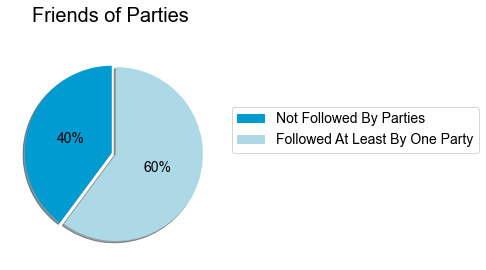

In [343]:
no_friend = list(total_friends).count(0)
yes_friend = len(total_friends) - no_friend

fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

fig.suptitle("Friends of Parties", fontsize=20, horizontalalignment='center', verticalalignment='center')

x = [no_friend, yes_friend]
labels = ['Not Followed By Parties', 'Followed At Least By One Party']
_=ax.pie(x, colors=color_palette_list[0:2],
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.05,0))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

## Follwing the Parties that are in the Parliament

In [351]:
lnght = len(results['id'])

### ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ - @neademokratia - 136.5K Followers

In [352]:
nea_dimo = [0 for i in range(lnght)]

In [353]:
nea_dimo_ids = []
for res in tweepy.Cursor(API.followers_ids, screen_name='neademokratia').items():
    nea_dimo_ids.append(res)

Rate limit reached. Sleeping for: 640


In [354]:
for i, ID in enumerate(results['id']):
    if ID in nea_dimo_ids:
        nea_dimo[i] = 1

In [355]:
del nea_dimo_ids

### ΣΥΡΙΖΑ - @syriza_gr - 107K Followers

In [360]:
syriza = [0 for i in range(lnght)]

In [361]:
syriza_ids = []
for res in tweepy.Cursor(API.followers_ids, screen_name='syriza_gr').items():
    syriza_ids.append(res)

Rate limit reached. Sleeping for: 891


In [362]:
len(syriza_ids)

107085

In [363]:
for i, ID in enumerate(results['id']):
    if ID in syriza_ids:
        syriza[i] = 1

In [364]:
del syriza_ids

### ΜέΡΑ25 - @mera25_gr - 8758

In [365]:
mera25 = [0 for i in range(lnght)]

In [366]:
mera25_ids = []
for res in tweepy.Cursor(API.followers_ids, screen_name='mera25_gr').items():
    mera25_ids.append(res)

In [367]:
for i, ID in enumerate(results['id']):
    if ID in mera25_ids:
        mera25[i] = 1

In [368]:
del mera25_ids

### Κίνημα Αλλαγής - @kinimallagis - 6670

In [369]:
kin_all = [0 for i in range(lnght)]

In [370]:
kin_all_ids = []
for res in tweepy.Cursor(API.followers_ids, screen_name='kinimallagis').items():
    kin_all_ids.append(res)

In [371]:
for i, ID in enumerate(results['id']):
    if ID in kin_all_ids:
        kin_all[i] = 1     

In [372]:
del kin_all_ids

### ΕΛΛΗΝΙΚΗ ΛΥΣΗ - @ellinikilisi - 6024 Followers

In [373]:
ell_lis = [0 for i in range(lnght)]

In [374]:
ell_lis_ids = []
for res in tweepy.Cursor(API.followers_ids, screen_name='ellinikilisi').items():
    ell_lis_ids.append(res)

In [375]:
for i, ID in enumerate(results['id']):   
    if ID in ell_lis_ids:
        ell_lis[i] = 1 

In [376]:
del ell_lis_ids

## Results

In [377]:
results['ND_Follower'] =  nea_dimo
results['Syriza_Follower'] = syriza
results['Mera25_Follower'] = mera25
results['Kinal_Follower'] = kin_all
results['EL_Follower'] = ell_lis

In [381]:
total_followers = results['ND_Follower'] + results['Syriza_Follower'] + results['Mera25_Follower'] +results['Kinal_Follower'] + results['EL_Follower']

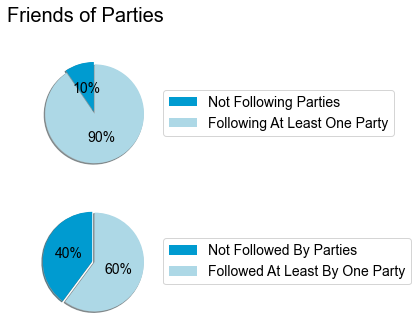

In [409]:
no_follower = list(total_followers).count(0)
yes_follower = len(total_followers) - no_follower

fig, ax = plt.subplots(2,1, figsize=(10,5))
color_palette_list = ['#009BD0', '#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

fig.suptitle("Following Parties", fontsize=20, horizontalalignment='center', verticalalignment='center')

x = [no_follower, yes_follower]
labels = ['Not Following Parties', 'Following At Least One Party']
_=ax[0].pie(x, colors=color_palette_list[0:2],
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.05,0))
ax[0].legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

fig.suptitle("Friends of Parties", fontsize=20, horizontalalignment='center', verticalalignment='center')

x = [no_friend, yes_friend]
labels = ['Not Followed By Parties', 'Followed At Least By One Party']
_=ax[1].pie(x, colors=color_palette_list[0:2],
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.05,0))
ax[1].legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

In [385]:
test = total_followers + total_friends

In [387]:
list(test).count(0)

19

In [411]:
list(total_followers).count(0)

23

In [413]:
list(total_friends).count(0)

96